### 4.
#### Construcción de una Librería Python - Esto ya creado ctg_viz, todo está en los módulos con archivos .py
### 5.
#### Creación de pruebas unitarias

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytest
#importación de la librería creada ctg_viz
from ctg_viz.preprocessing import preprocessing
from ctg_viz.categorization import check_data_completeness_Magdaleno_Flores_Nilton_Sebastian
from ctg_viz.plots import barplots, heatmap

In [15]:
#Se usará el data set CTG.csv para las pruebas
path_ds = 'CTG.csv'
df = pd.read_csv(path_ds)

In [ ]:
def test_preprocessing_basic():
    result = preprocessing(df)                  # Llama a la función de preprocesamiento
    assert isinstance(result, pd.DataFrame)     # Verifica que el resultado sea un DataFrame
    print("Columnas después del preprocesamiento:", result.columns)
    assert result.isnull().sum().sum() == 0     # Sin valores faltantes
    print("Número de columnas después del preprocesamiento:", len(result.columns))
    assert 'A' in result.columns                # Columna numérica no eliminada si no > 20% nulo
    print("Prueba de preprocesamiento básica pasada.")
test_preprocessing_basic()                      # Ejecuta la prueba de preprocesamiento básica

No hay columnas con >20% de nulos para eliminar.
Columnas después del preprocesamiento: Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')
Número de columnas después del preprocesamiento: 40
Prueba de preprocesamiento básica pasada.


In [ ]:
def test_check_data_completeness():
    # Usamos el DataFrame preprocesado para la prueba
    result = check_data_completeness_Magdaleno_Flores_Nilton_Sebastian(df)
    # Verificamos que el resultado sea un DataFrame
    assert isinstance(result, pd.DataFrame)
    print("Resultado de check_data_completeness_Magdaleno_Flores_Nilton_Sebastian:")
    print(result)
    # Verificamos que las columnas esperadas estén presentes
    assert 'Columna' in result.columns
    print("Columnas en el resultado:", result.columns)
    # Verificamos que las columnas 'Nulos' y 'Clasificación' estén presentes
    assert 'Nulos' in result.columns
    print("Número de nulos en cada columna:")
    print(result['Nulos'])
    assert 'Clasificación' in result.columns
    print("Clasificación de cada columna:")
    # Imprimimos la clasificación para verificar visualmente
    print(result['Clasificación'])
    print("Prueba de check_data_completeness pasada.")

test_check_data_completeness()                # Ejecuta la prueba de check_data_completeness

Resultado de check_data_completeness_Magdaleno_Flores_Nilton_Sebastian:
     Columna  Nulos  % Completitud Tipo Dato  Valores Únicos  Std Dev  \
0   FileName      3          99.86    object             352      NaN   
1       Date      3          99.86    object              48      NaN   
2    SegFile      3          99.86    object            2126      NaN   
3          b      3          99.86   float64             979   894.08   
4          e      3          99.86   float64            1064   930.92   
5        LBE      3          99.86   float64              48     9.84   
6         LB      3          99.86   float64              48     9.84   
7         AC      3          99.86   float64              22     3.56   
8         FM      2          99.91   float64              96    39.03   
9         UC      2          99.91   float64              19     2.88   
10      ASTV      2          99.91   float64              75    17.21   
11      MSTV      2          99.91   float64        

bar_plot executed successfully.


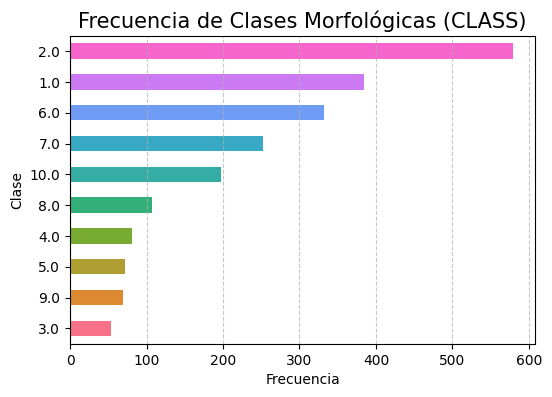

In [ ]:
def test_bar_plot_runs_without_error():
    try:
        barplots.bar_plot(df)                               # Prueba que no lanza error
        print("bar_plot executed successfully.")            # Mensaje de éxito
    except Exception as e:
        pytest.fail(f"bar_plot raised an exception {e}")    # Falla la prueba si hay excepción
test_bar_plot_runs_without_error()    

heatmap_plot executed successfully.


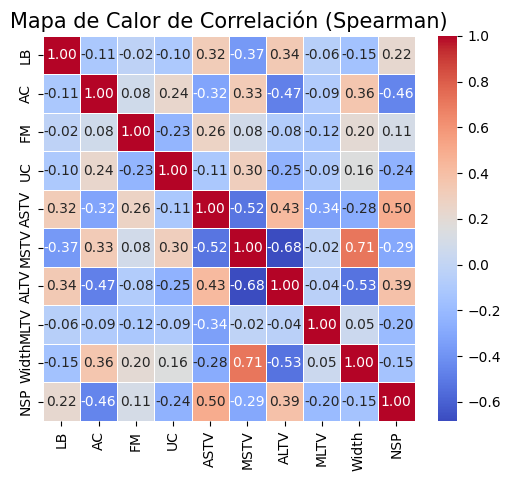

In [20]:
def test_heatmap_plot_runs_without_error():
    # Verificar que la función se ejecuta sin lanzar errores
    try:
        heatmap.heatmap_plot(df)                            # Prueba que no lanza error
        print("heatmap_plot executed successfully.")        # Mensaje de éxito
    except Exception as e:
        pytest.fail(f"heatmap_plot raised an exception {e}")    # Falla la prueba si hay excepción

test_heatmap_plot_runs_without_error()

#### Visualizaciones Generadas
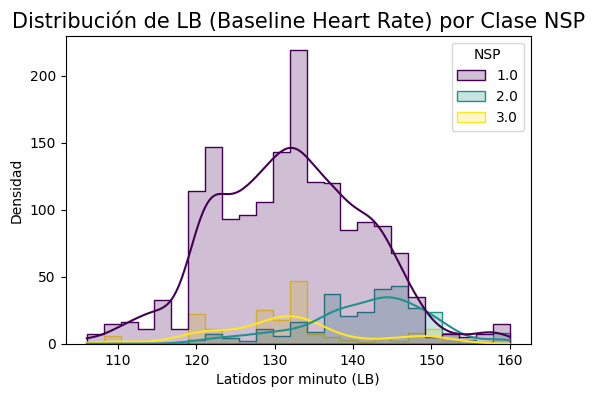

1.- Distribución de Frecuencia Cardíaca Basal (LB)

La frecuencia cardíaca basal presenta una distribución aproximadamente normal centrada en 130-135 LPM para casos normales (NSP 1.0)  
Existe un marcado desbalance de clases, con predominio abrumador de casos normales  
Los casos patológicos (NSP 2.0 y 3.0) muestran mayor dispersión y menor concentración central  
Se observa solapamiento significativo entre clases en el rango 120-140 LPM  

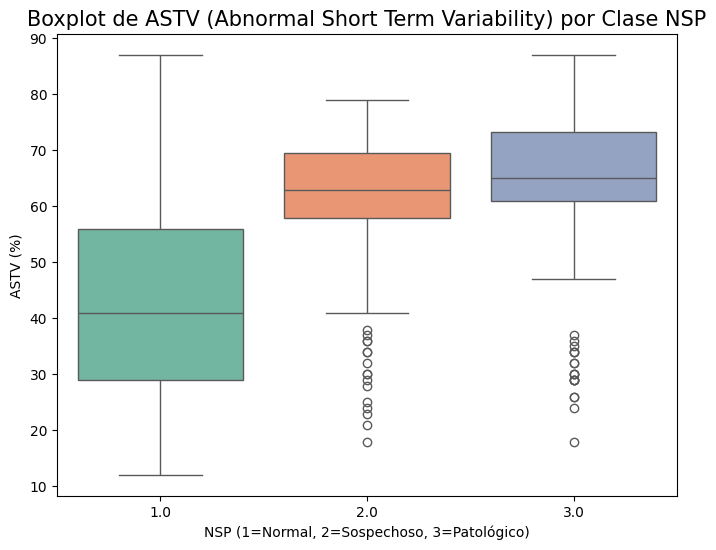

2.- Variabilidad a Corto Plazo Anormal (ASTV)

NSP 1.0 (Normal): Mediana ~40%, rango intercuartílico 30-56%  
NSP 2.0 (Sospechoso): Mediana ~65%, rango intercuartílico 58-70%  
NSP 3.0 (Patológico): Mediana ~65%, rango intercuartílico 62-73%  

Existe una clara progresión en los valores de ASTV conforme aumenta la severidad del compromiso fetal. Los casos patológicos muestran:  
Valores consistentemente más elevados  
Menor dispersión (cajas más compactas)  
Presencia de valores atípicos en rangos extremos

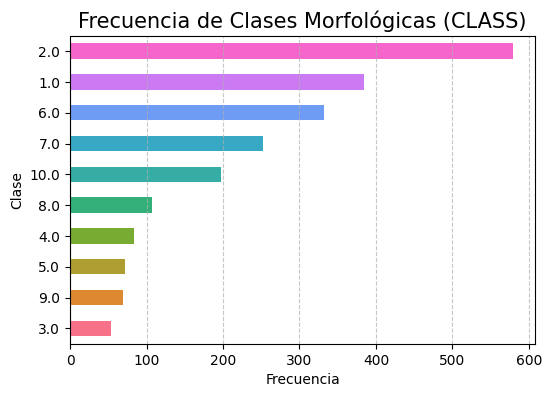

3.- Distribución de Clases Morfológicas (CLASS)

Clase 2.0: ~550 casos (dominante)  
Clase 1.0: ~360 casos  
Clase 6.0: ~300 casos  
Clases restantes: distribución decreciente  
La variable CLASS representa patrones morfológicos del trazado CTG. La alta frecuencia de la clase 2.0 sugiere que este patrón es el más común en la población estudiada, probablemente correspondiente a trazados normales o reactivos.

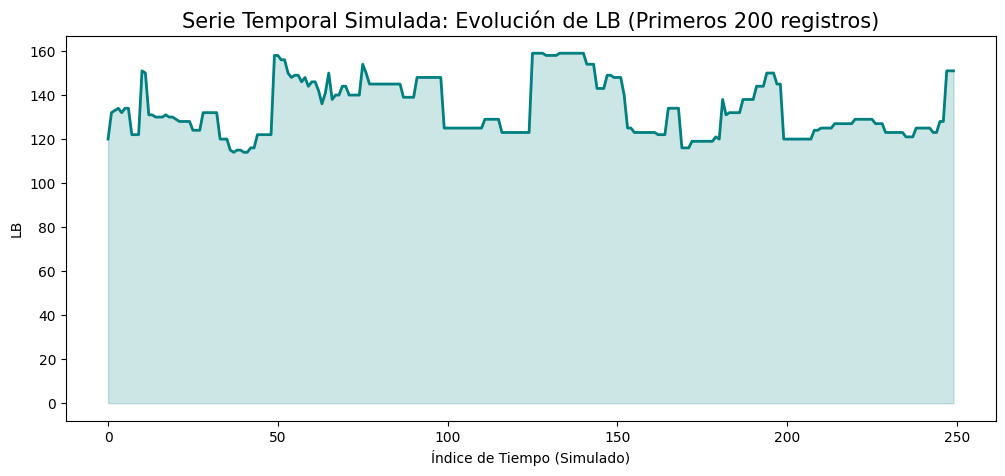

4.- Serie Temporal Simulada de LB

Fluctuaciones dinámicas entre 110-160 LPM  
Períodos de relativa estabilidad alternando con cambios bruscos  
Variación típica del monitoreo fetal continuo


La serie temporal demuestra la naturaleza dinámica de la frecuencia cardíaca fetal, reflejando:

Respuestas a movimientos fetales  
Ciclos de sueño-vigilia  
Posibles respuestas a contracciones uterinas

Esta variabilidad beat-to-beat es esencial para la evaluación del bienestar fetal.

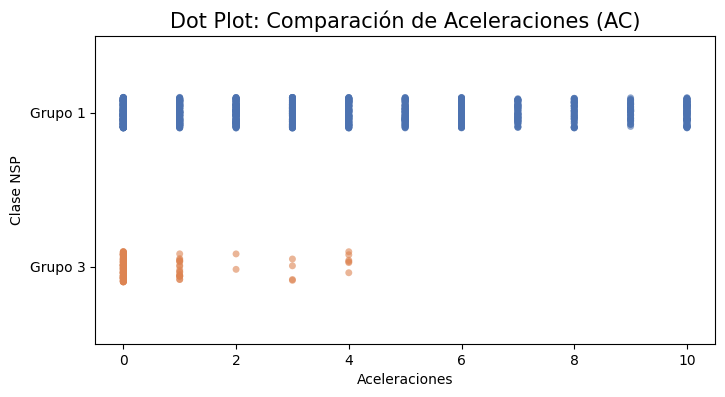

5.- Aceleraciones Cardíacas (AC)

Grupo 1 (NSP 1.0): Consistentemente 10-11 aceleraciones  
Grupo 3 (NSP 3.0): 0-5 aceleraciones, con alta variabilidad
 
Las aceleraciones son el indicador más robusto de bienestar fetal. La presencia de ≥2 aceleraciones en 20 minutos define un NST reactivo (normal). Los casos patológicos muestran:

Ausencia completa de aceleraciones en algunos casos  
Reducción dramática en frecuencia  
Mayor inconsistencia entre casos  

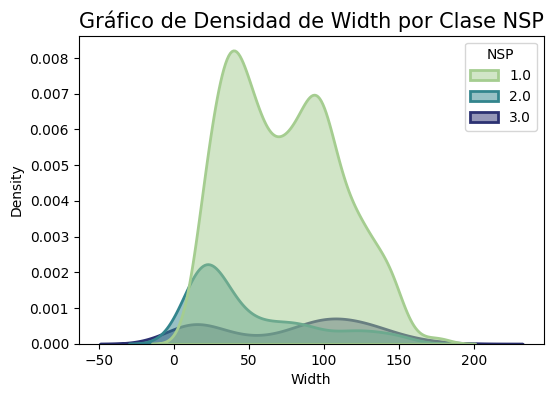

6.- Distribución de Width (Ancho de Histograma)

NSP 1.0: Distribución bimodal con picos en ~40 y ~100 ms  
NSP 2.0 y 3.0: Distribuciones más aplanadas y dispersas

El Width representa la amplitud del histograma de frecuencia cardíaca. La distribución bimodal en casos normales sugiere:

Dos patrones fisiológicos distintos (posiblemente sueño activo vs. tranquilo)  
Mayor variabilidad organizada  
Respuesta fisiológica normal del sistema nervioso autónomo

Los casos patológicos muestran pérdida de esta estructura, indicando desregulación autonómica.

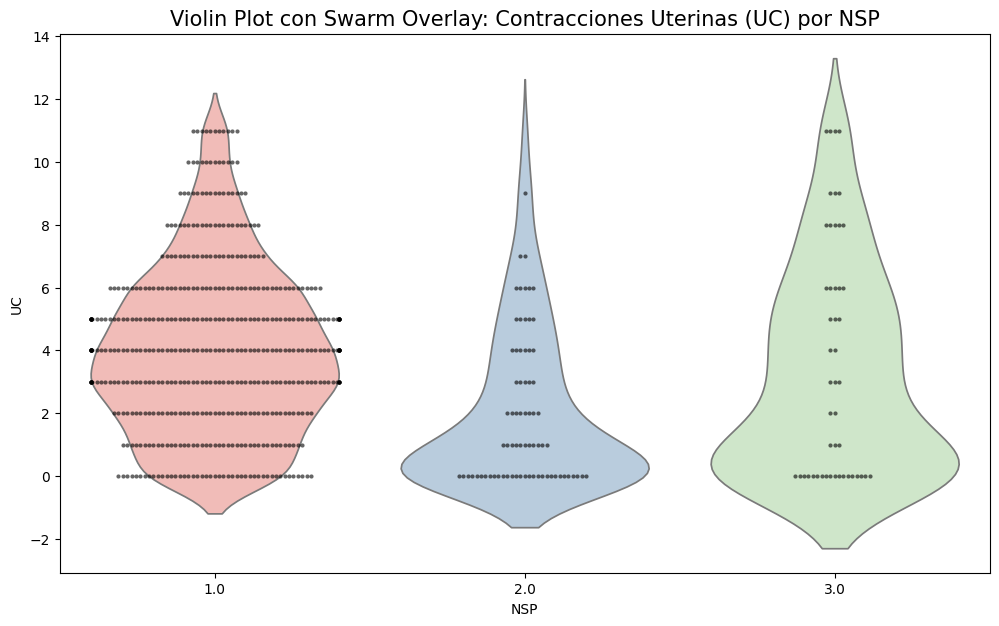

7.- Contracciones Uterinas (UC)

NSP 1.0: Distribución amplia (0-12 contracciones), mediana ~3  
NSP 2.0: Distribución más estrecha y concentrada, mediana <1  
NSP 3.0: Distribución bimodal con concentración en valores bajos pero algunos casos con valores altos

La relación entre contracciones y clasificación NSP es compleja:

Casos normales toleran mejor las contracciones  
Casos patológicos pueden mostrar compromiso incluso con pocas contracciones  
La presencia de contracciones frecuentes en algunos casos NSP 3.0 sugiere posible trabajo de parto con compromiso fetal

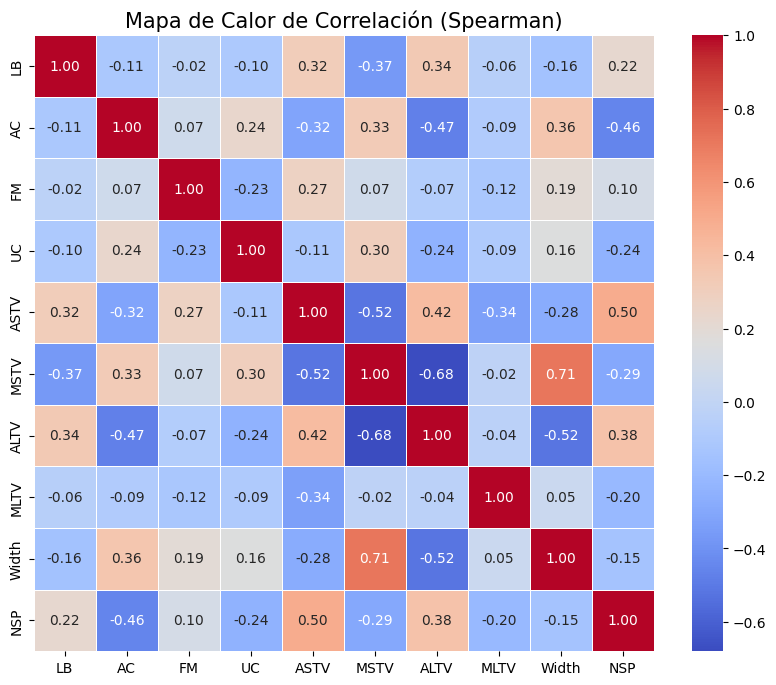

8.- Matriz de Correlación (Spearman)
Correlaciones significativas identificadas:  
Positivas fuertes (>0.5):

Width ↔ MSTV (0.71): La variabilidad media a largo plazo correlaciona fuertemente con el ancho del histograma  
ASTV ↔ NSP (0.50): La variabilidad anormal aumenta con la severidad del compromiso

Negativas moderadas (<-0.5):

MSTV ↔ ASTV (-0.52): Relación inversa entre variabilidades diferentes  
ALTV ↔ MSTV (-0.68): Las variabilidades a largo plazo muestran relación inversa  
Width ↔ ALTV (-0.52): El ancho del histograma se relaciona inversamente con ciertos tipos de variabilidad

Correlaciones con NSP:

AC ↔ NSP (-0.46): Las aceleraciones disminuyen con el compromiso (relación negativa esperada)  
ASTV ↔ NSP (0.50): La variabilidad anormal aumenta con el compromiso  
ALTV ↔ NSP (0.38): Correlación positiva moderada

#### Recomendaciones Analíticas

Desarrollar modelos predictivos que integren múltiples parámetros  
Investigar técnicas de balanceo de clases para mejorar detección de casos patológicos  
Validar umbrales específicos para población local  


### Streamlit

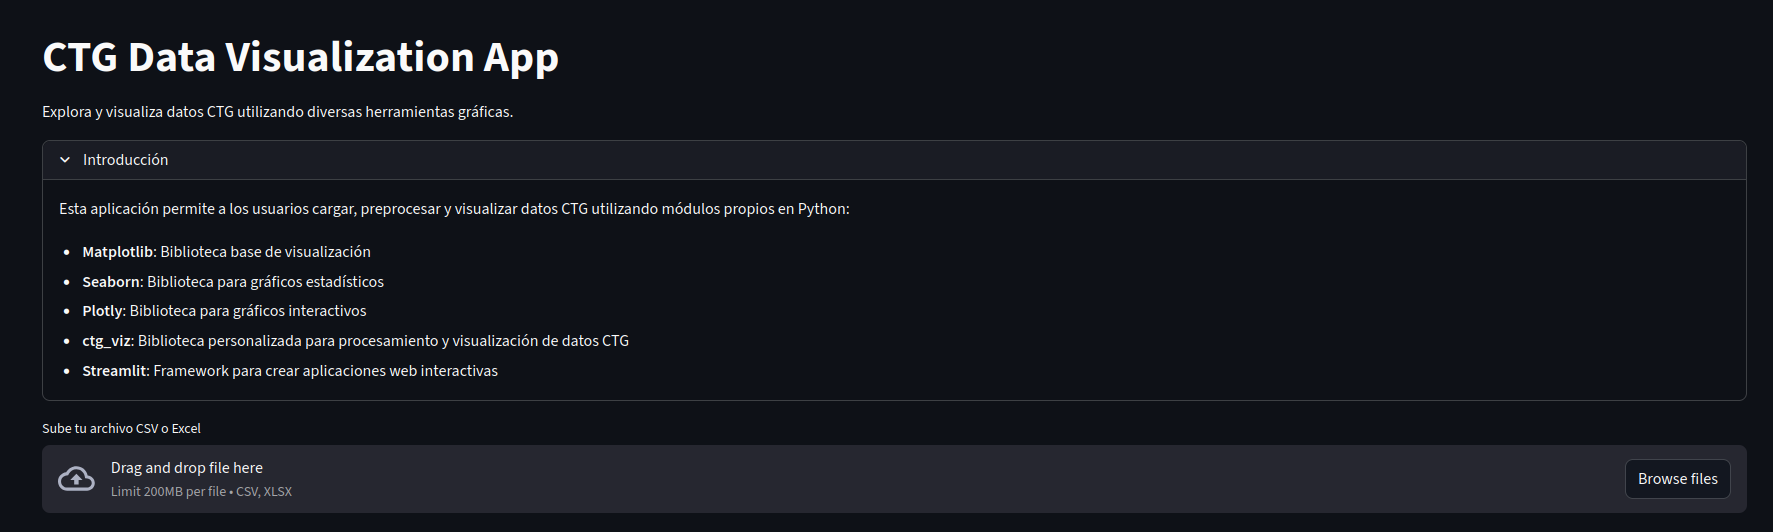

El código con la integración de Streamlit se encuentra en app.py.  
Donde se utiliza una función del módulo utils.py para cargar csv o xlsx.

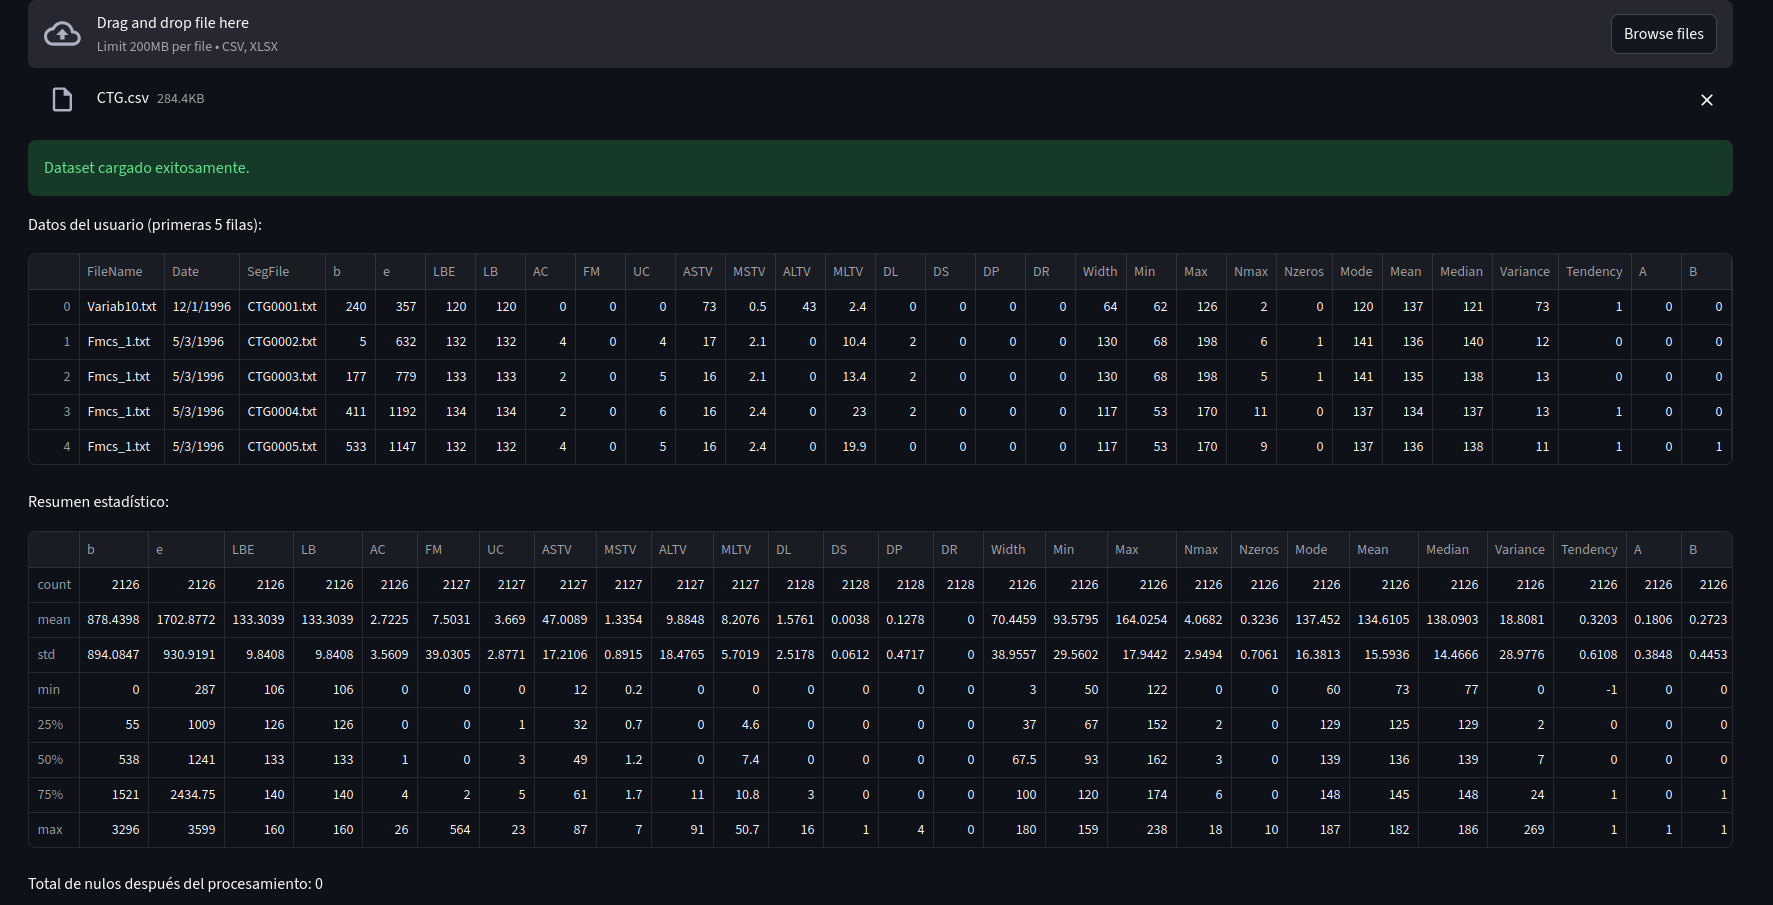

Para las visualizaciones, se crearon algunas funciones en los módulos de la carpeta plots/ para mostrar gráficos interactivos.  

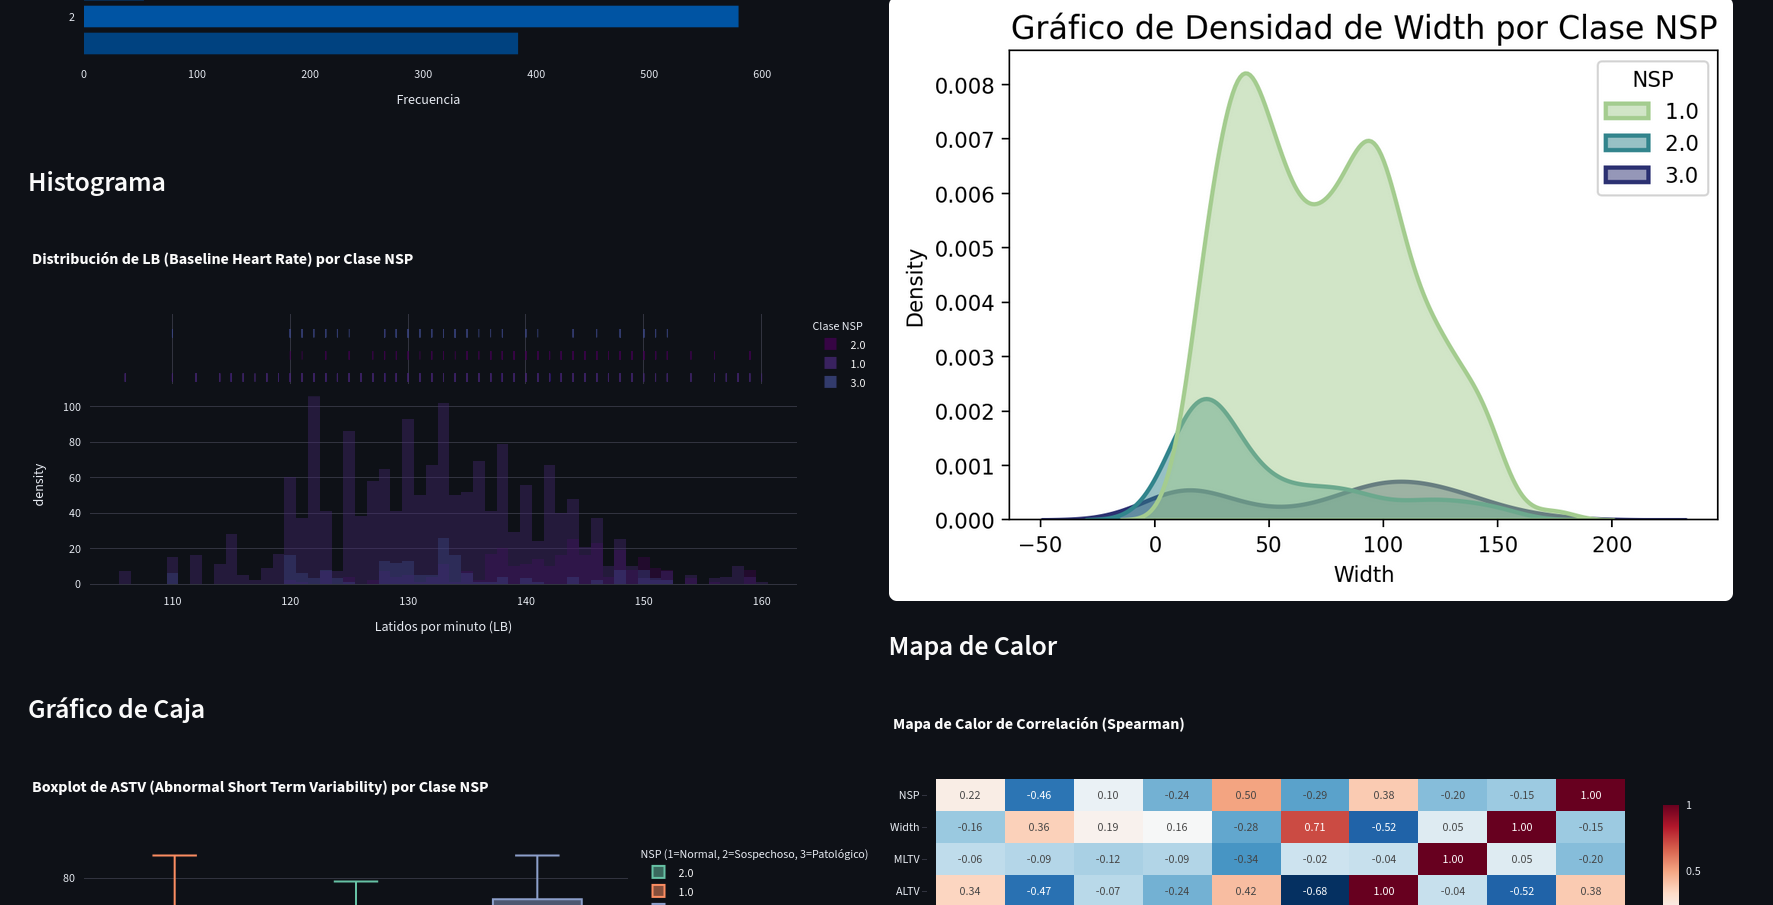